
### Loading the libraries


In [16]:
# !pip install vaderSentiment
import pandas as pd
import urllib.request
import io
import transformers
import tensorflow as tf
import numpy as np
import sklearn
import vaderSentiment
import nltk
import collections
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Uploading

In [2]:
# Specify the URL of the CSV file
url = 'https://drive.google.com/uc?id=1DNXnMO8murxUXA0Ll_Y-T2fPjMgHSG3U'

# Download the CSV file
response = urllib.request.urlopen(url)
data = response.read()

# Convert the downloaded data into DataFrame
df = pd.read_csv(io.BytesIO(data))

print(df.shape)


(31814, 16)


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31814 entries, 0 to 31813
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SKU                31814 non-null  object 
 1   PRODUCT_NAME       31814 non-null  object 
 2   PRICE              31814 non-null  object 
 3   PRODUCT_CATEGORY   31814 non-null  object 
 4   PACK_SIZE          31814 non-null  object 
 5   REVIEW_COUNT       31773 non-null  float64
 6   REVIEW_DATE        31773 non-null  object 
 7   REVIEW_TIME        31773 non-null  object 
 8   PRICE_RATING       31773 non-null  float64
 9   QUALITY_RATING     31773 non-null  float64
 10  VALUE_RATING       31773 non-null  float64
 11  REVIEW_CONTENT     31768 non-null  object 
 12  URL                31814 non-null  object 
 13  DATE_OF_CREATION   31814 non-null  object 
 14  LAST_UPDATED_DATE  31814 non-null  object 
 15  STATES             31814 non-null  object 
dtypes: float64(4), object(

,REVIEW_COUNT,PRICE_RATING,QUALITY_RATING,VALUE_RATING
count,31773.000000,31773.000000,31773.000000,31773.000000
mean,343.462342,4.819406,0.257735,0.225695
std,392.684772,0.507707,1.100691,0.976311
min,1.000000,0.000000,0.000000,0.000000
25%,77.000000,5.000000,0.000000,0.000000
50%,159.000000,5.000000,0.000000,0.000000
75%,487.000000,5.000000,0.000000,0.000000
max,1456.000000,5.000000,5.000000,5.000000


In [4]:
#  df.head()

# Descriptive Analysis

In [5]:
print(df.isnull().sum())

SKU                   0
PRODUCT_NAME          0
PRICE                 0
PRODUCT_CATEGORY      0
PACK_SIZE             0
REVIEW_COUNT         41
REVIEW_DATE          41
REVIEW_TIME          41
PRICE_RATING         41
QUALITY_RATING       41
VALUE_RATING         41
REVIEW_CONTENT       46
URL                   0
DATE_OF_CREATION      0
LAST_UPDATED_DATE     0
STATES                0
dtype: int64


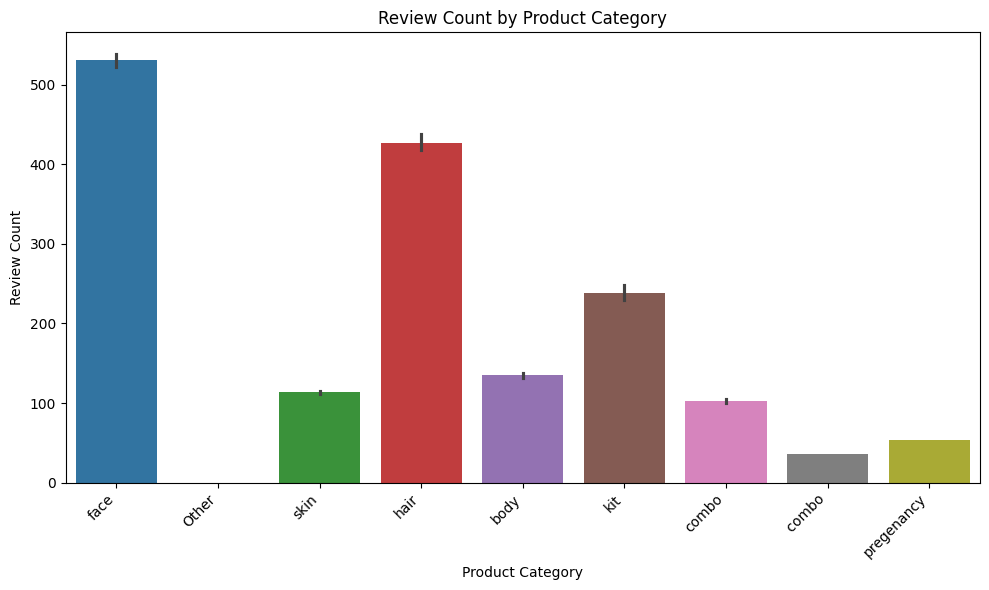

In [ ]:
# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='PRODUCT_CATEGORY', y='REVIEW_COUNT',hue='PRODUCT_CATEGORY')
plt.xlabel('Product Category')
plt.ylabel('Review Count')
plt.title('Review Count by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


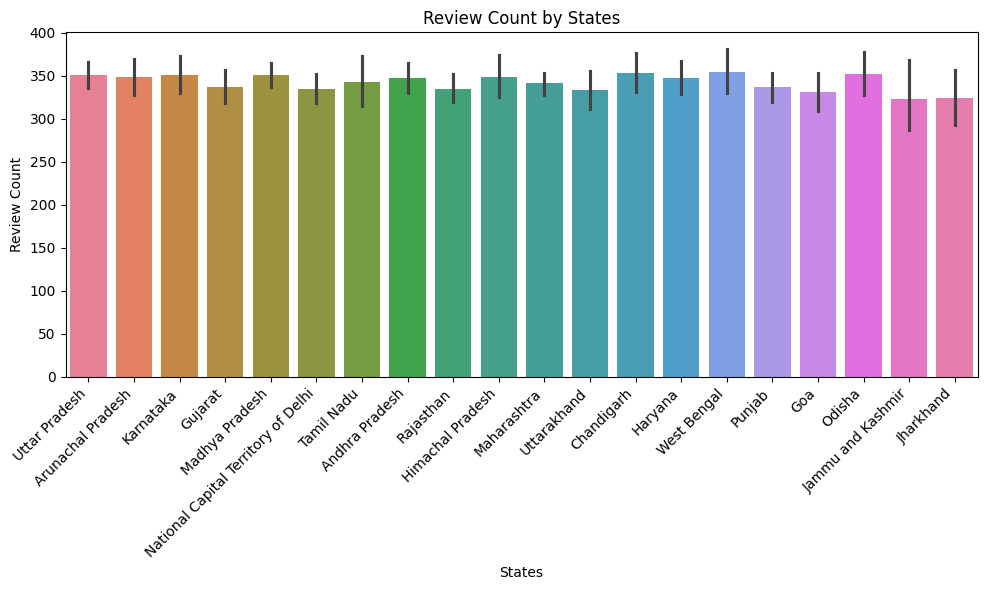

In [ ]:
# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='STATES', y='REVIEW_COUNT',hue='STATES')
plt.xlabel('States')
plt.ylabel('Review Count')
plt.title('Review Count by States')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

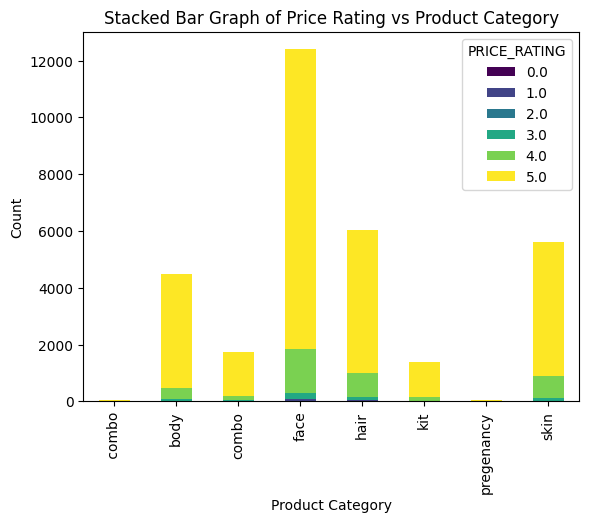

In [ ]:

pivot_table = df.pivot_table(index='PRODUCT_CATEGORY', columns='PRICE_RATING', aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Price Rating vs Product Category')

# Show plot
plt.show()


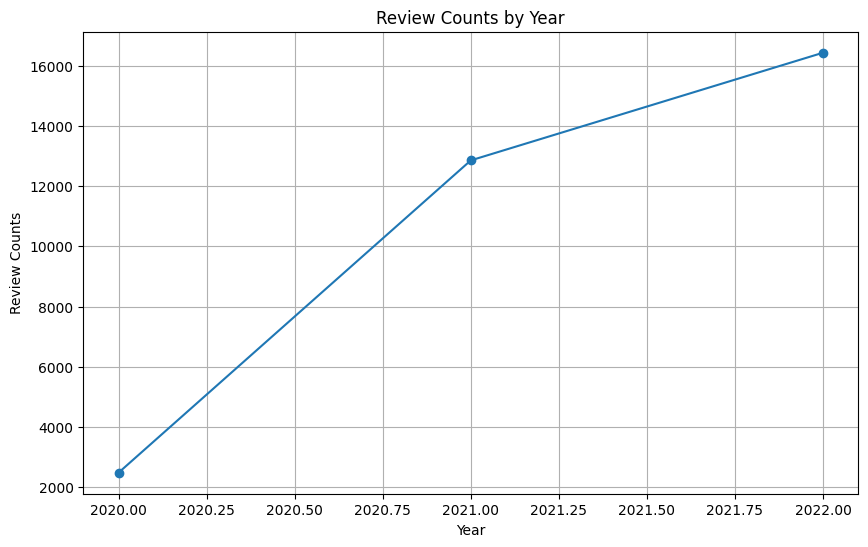

In [ ]:
df['REVIEW_DATE'] = pd.to_datetime(df['REVIEW_DATE'], format='%Y-%m-%d')
df['Year'] = df['REVIEW_DATE'].dt.year

review_counts = df.groupby('Year').size()

plt.figure(figsize=(10, 6))
review_counts.plot(marker='o')
plt.title('Review Counts by Year')
plt.xlabel('Year')
plt.ylabel('Review Counts')
plt.grid(True)
plt.show()


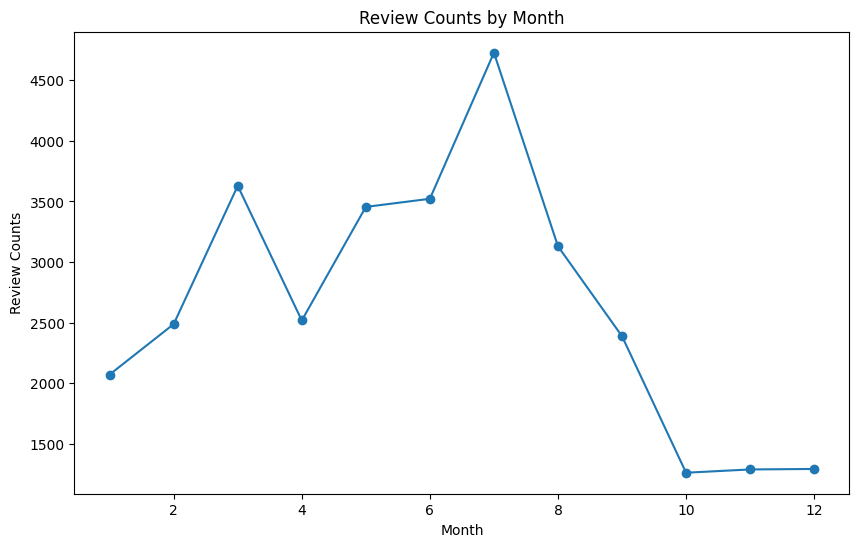

In [ ]:
df['Month'] = df['REVIEW_DATE'].dt.month

# Group by month and count reviews
review_counts = df.groupby('Month').size()

# Plot the timeseries graph
plt.figure(figsize=(10, 6))
review_counts.plot(marker='o')
plt.title('Review Counts by Month')
plt.xlabel('Month')
plt.ylabel('Review Counts')
# plt.grid(True)
plt.show()

In [ ]:
unique_ = df.iloc[:, 1].value_counts()

print(unique_)

Ubtan Face Wash with Turmeric & Saffron for Tan Removal – 100ml                             1456
Vitamin C Foaming Face Wash with Vitamin C and Turmeric for Skin Illumination - 150ml       1194
Onion Hair Oil for Hair Regrowth and Hair Fall Control with Redensyl, 150ml                 1108
Onion Shampoo with Onion and Plant Keratin for Hair Fall Control - 250ml                     780
Vitamin C Face Wash with Vitamin C and Turmeric for Skin Illumination - 100ml                660
                                                                                            ... 
Glow Serum Foundation-Sand Glow                                                                1
Soothing Waterproof Eyeliner with Almond Oil & Castor Oil for 10 Hour Long Stay - 3.5 ml       1
Winter Essential Kit For Babies                                                                1
Coco Soft Shampoo with Coconut Milk & Turmeric for Gentle Cleansing - 400 ml                   1
Moisture Matte Longstay Lipsti

# Data Pre-processing

In [6]:
# df.drop(['SKU'],axis=1,inplace=True)
df.drop(df.columns[[1,6,7,12,13,14,15]],axis=1,inplace=True)
df.drop_duplicates()
df.dropna(subset = ['REVIEW_CONTENT'], inplace = True)
print(df.shape)


(31768, 9)


In [7]:
print(df.isnull().sum())
df.info()


SKU                 0
PRICE               0
PRODUCT_CATEGORY    0
PACK_SIZE           0
REVIEW_COUNT        0
PRICE_RATING        0
QUALITY_RATING      0
VALUE_RATING        0
REVIEW_CONTENT      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 31768 entries, 4 to 31813
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SKU               31768 non-null  object 
 1   PRICE             31768 non-null  object 
 2   PRODUCT_CATEGORY  31768 non-null  object 
 3   PACK_SIZE         31768 non-null  object 
 4   REVIEW_COUNT      31768 non-null  float64
 5   PRICE_RATING      31768 non-null  float64
 6   QUALITY_RATING    31768 non-null  float64
 7   VALUE_RATING      31768 non-null  float64
 8   REVIEW_CONTENT    31768 non-null  object 
dtypes: float64(4), object(5)
memory usage: 2.4+ MB


#Key Phrase Extraction using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud


In [ ]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=500)

# Fit and transform the 'Review_content' column to TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['REVIEW_CONTENT'])

# Get feature names (phrases)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate TF-IDF scores for each feature (phrase)
tfidf_scores = tfidf_matrix.sum(axis=0).A1

In [ ]:
# Create a dictionary to store phrases and their TF-IDF scores
phrases_tfidf = dict(zip(feature_names, tfidf_scores))

# Sort the phrases based on TF-IDF scores in descending order
sorted_phrases_tfidf = sorted(phrases_tfidf.items(), key=lambda x: x[1], reverse=True)

In [ ]:
# Display the top 15 most frequent words/phrases
top_phrases = sorted_phrases_tfidf[:25]
for phrase, score in top_phrases:
    print(f"{phrase}: {score}")

product: 2618.696652606418
good: 2598.0793222723278
it: 2117.167419434101
nice: 1828.6212944905794
and: 1538.58410617692
very: 1521.4844053411036
this: 1440.3891231855273
like: 1332.3023715662964
is: 1228.2446202637277
the: 1154.2004858329124
my: 1074.3073453395687
good product: 1039.6574860742373
skin: 1026.7993362908467
for: 1023.1506728869306
amazing: 907.4494260818734
products: 900.3379185674562
really: 870.1907629892972
best: 859.9792066429393
love: 858.1469282145941
nice product: 833.6210841107339
hair: 805.488882780448
mamaearth: 781.5320691984334
this product: 759.7501077235394
very good: 757.6497690283248
to: 705.179567083305


In [ ]:
# # Print the TF-IDF matrix and feature names
# print("TF-IDF Matrix:")
# print(tfidf_matrix)
# print("\nFeature Names:")
# print(feature_names)

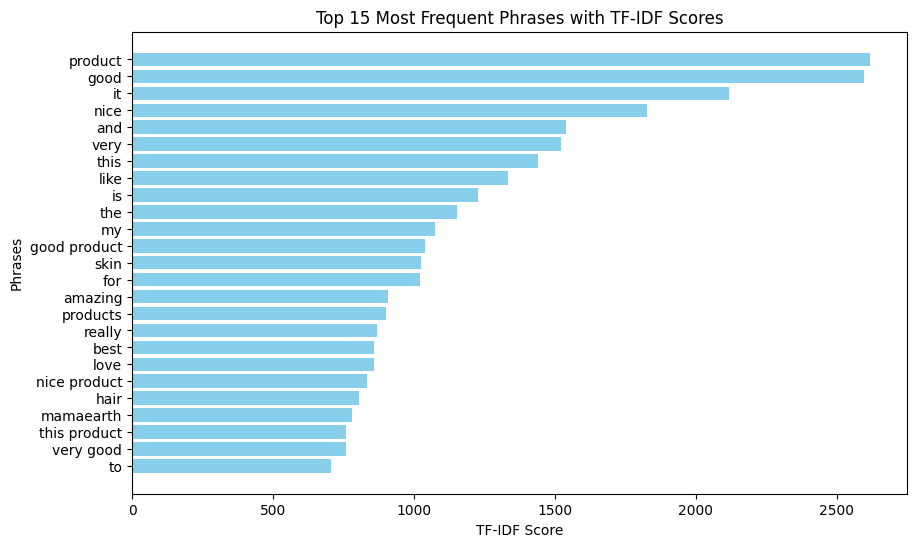

In [ ]:
phrases, scores = zip(*top_phrases)
# Plot the top phrases
plt.figure(figsize=(10, 6))
plt.barh(phrases, scores, color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Phrases')
plt.title('Top 15 Most Frequent Phrases with TF-IDF Scores')
plt.gca().invert_yaxis()
plt.show()

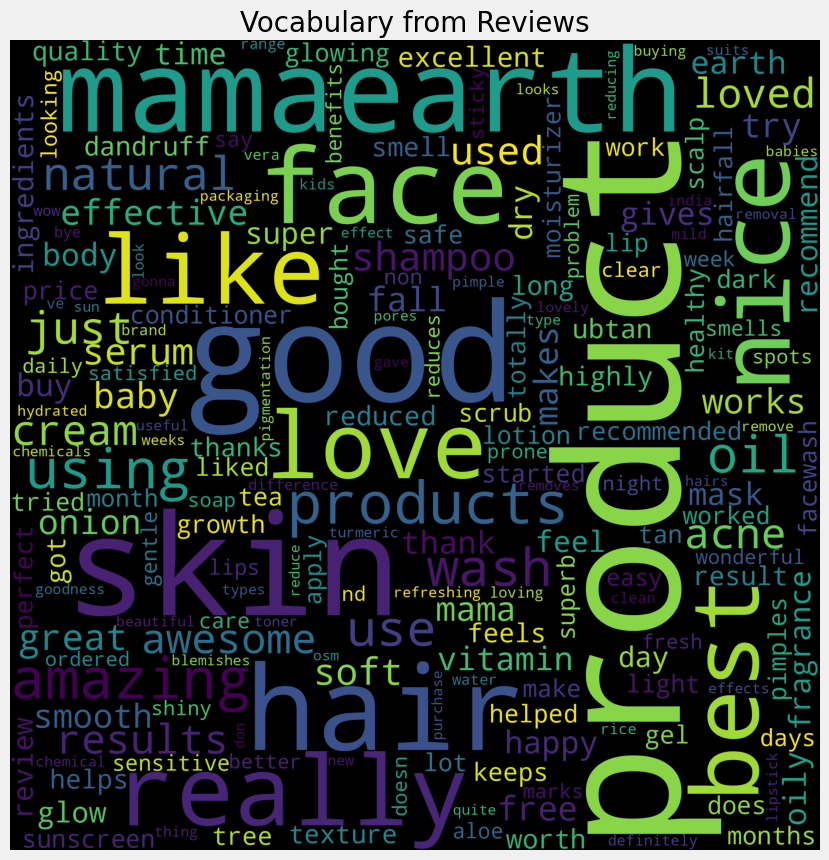

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.REVIEW_CONTENT)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

# Topic Modelling

In [25]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Group rows by 'ID' and concatenate 'KEY_PHRASES'
grouped_phrases = df.groupby('SKU')['REVIEW_CONTENT'].apply(lambda x: ' '.join(x)).reset_index(drop=True)
# Define common stopwords
stop_words = set(stopwords.words('english'))
# Tokenize the concatenated phrases and remove stopwords
tokenized_phrases = [[word for word in simple_preprocess(phrase) if word not in stop_words] for phrase in grouped_phrases]

# Create a dictionary representation of the tokenized phrases
dictionary = Dictionary(tokenized_phrases)

# Convert the dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(phrase) for phrase in tokenized_phrases]

In [41]:
# Set the number of topics
num_topics = 15

# Build the LDA model with more passes
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, random_state=42)

# # Print the topics and the top words for each topic
# for topic_num in range(num_topics):
#     print(f"Topic #{topic_num + 1}:")
#     print(lda_model.print_topic(topic_num, topn=10))
#     print()

# Calculate coherence score to evaluate the model
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_phrases, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'\nCoherence Score: {coherence_lda}')


Coherence Score: 0.37345016299518224


# Sentiments

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from sklearn.metrics import accuracy_score
from multiprocessing import Pool
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def analyze_sentiment_vader(review):
    sentiment_score = analyzer.polarity_scores(review)['compound']
    if sentiment_score > 0.05:
        return 1  # Positive
    elif sentiment_score < -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

In [ ]:
df['VaderSentiment'] = df['REVIEW_CONTENT'].apply(analyze_sentiment_vader)

# Print the counts of each sentiment
sentiment_counts = df['VaderSentiment'].value_counts()
print("Positive:", sentiment_counts[1])
print("Neutral:", sentiment_counts[0])
print("Negative:", sentiment_counts[-1])


Positive: 29335
Neutral: 2031
Negative: 402


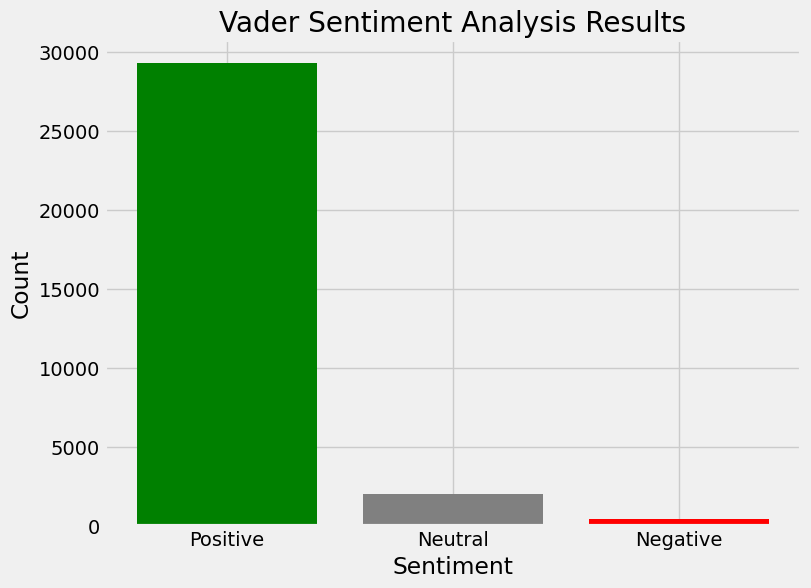

In [ ]:
# Plot a bar graph to visualize the distribution of Vader sentiment labels
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Neutral', 'Negative'], df['VaderSentiment'].value_counts(), color=['green', 'gray', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Vader Sentiment Analysis Results')
plt.show()

# Text Blob

In [ ]:
from textblob import TextBlob


In [ ]:
def analyze_sentiment(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    polarity = textblob.sentiment.polarity

    if polarity > 0:
        return 1  # Positive sentiment
    elif polarity < 0:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment
df['Sentiment_Blob'] = df['REVIEW_CONTENT'].apply(analyze_sentiment)

In [ ]:
# Apply sentiment analysis to each review and create a new column 'Sentiment'
df['Sentiment_Blob'] = df['REVIEW_CONTENT'].apply(analyze_sentiment)

# Print value counts with the desired labels
print("TextBlob:")
sentiment_counts = df['Sentiment_Blob'].value_counts()
print("Positive:", sentiment_counts[1])
print("Neutral:", sentiment_counts[0])
print("Negative:", sentiment_counts[-1])

TextBlob:
Positive: 27845
Neutral: 3498
Negative: 425


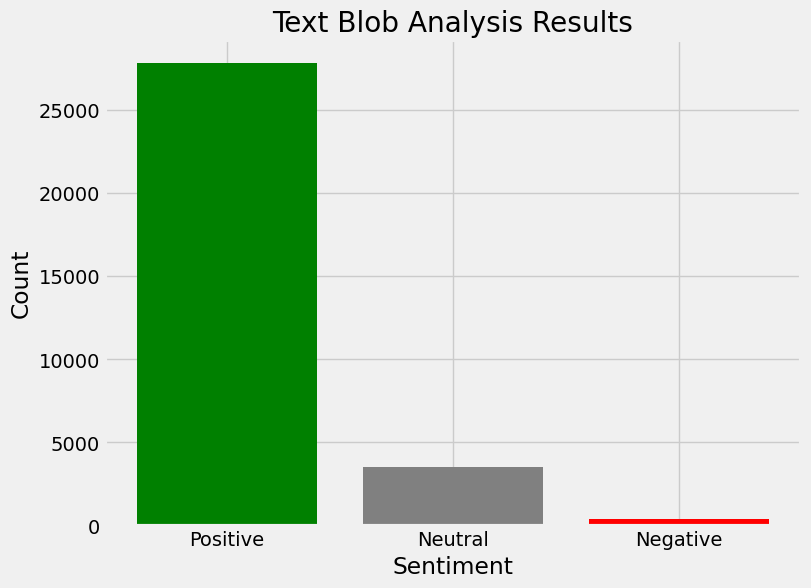

In [ ]:
# Plot a bar graph to visualize the distribution of Text Blob labels
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Neutral', 'Negative'], df['Sentiment_Blob'].value_counts(), color=['green', 'gray', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Text Blob Analysis Results')
plt.show()

# Sentiment Analysis using Price Rating

In [ ]:
# Define a function to map ratings to sentiment values
df['SENTIMENT'] = df['PRICE_RATING'].apply(lambda x: 1 if x > 3 else (0 if x == 0 else -1))

print(df['SENTIMENT'].value_counts())
reviews = df['REVIEW_CONTENT'].values.tolist()
labels = df['SENTIMENT'].tolist()

 1    31040
-1      715
 0       13
Name: SENTIMENT, dtype: int64


# Rating Analysis

In [ ]:
from sklearn import preprocessing
df[df.columns[[1]]] = df[df.columns[[1]]].replace(',', '', regex=True).astype('float64')

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31768 entries, 4 to 31813
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SKU               31768 non-null  object 
 1   PRICE             31768 non-null  float64
 2   PRODUCT_CATEGORY  31768 non-null  object 
 3   PACK_SIZE         31768 non-null  object 
 4   REVIEW_COUNT      31768 non-null  float64
 5   PRICE_RATING      31768 non-null  float64
 6   QUALITY_RATING    31768 non-null  float64
 7   VALUE_RATING      31768 non-null  float64
 8   REVIEW_CONTENT    31768 non-null  object 
 9   Year              31768 non-null  float64
 10  Month             31768 non-null  float64
 11  VaderSentiment    31768 non-null  int64  
 12  Sentiment_Blob    31768 non-null  int64  
 13  SENTIMENT         31768 non-null  int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 3.6+ MB


,PRICE,REVIEW_COUNT,PRICE_RATING,QUALITY_RATING,VALUE_RATING,Year,Month,VaderSentiment,Sentiment_Blob,SENTIMENT
count,31768.000000,31768.000000,31768.000000,31768.000000,31768.000000,31768.000000,31768.000000,31768.000000,31768.000000,31768.000000
mean,462.218805,343.459267,4.819504,0.257775,0.225730,2021.439782,5.928072,0.910759,0.863133,0.954577
std,234.592749,392.680484,0.507290,1.100773,0.976384,0.633947,2.943774,0.326479,0.380652,0.297282
min,149.000000,1.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,319.000000,77.000000,5.000000,0.000000,0.000000,2021.000000,3.000000,1.000000,1.000000,1.000000
50%,399.000000,159.000000,5.000000,0.000000,0.000000,2022.000000,6.000000,1.000000,1.000000,1.000000
75%,500.000000,487.000000,5.000000,0.000000,0.000000,2022.000000,8.000000,1.000000,1.000000,1.000000
max,1746.000000,1456.000000,5.000000,5.000000,5.000000,2022.000000,12.000000,1.000000,1.000000,1.000000


In [ ]:
def find_correlation(df):
    columns_to_correlate = ['PRICE', 'PRICE_RATING', 'VALUE_RATING','QUALITY_RATING', 'REVIEW_COUNT', 'Sentiment_Blob', 'VaderSentiment', 'SENTIMENT']
    correlations = df[columns_to_correlate].corr()
    return correlations

correlations = find_correlation(df)
print(correlations)


                   PRICE  PRICE_RATING  VALUE_RATING  QUALITY_RATING  \
PRICE           1.000000      0.006239     -0.020104       -0.019704   
PRICE_RATING    0.006239      1.000000     -0.218098       -0.258352   
VALUE_RATING   -0.020104     -0.218098      1.000000        0.985914   
QUALITY_RATING -0.019704     -0.258352      0.985914        1.000000   
REVIEW_COUNT   -0.227226     -0.019154      0.016048        0.016209   
Sentiment_Blob -0.021092      0.069316      0.015625        0.017190   
VaderSentiment -0.020498      0.056696     -0.001092       -0.000894   
SENTIMENT       0.001485      0.708983     -0.083537       -0.132561   

                REVIEW_COUNT  Sentiment_Blob  VaderSentiment  SENTIMENT  
PRICE              -0.227226       -0.021092       -0.020498   0.001485  
PRICE_RATING       -0.019154        0.069316        0.056696   0.708983  
VALUE_RATING        0.016048        0.015625       -0.001092  -0.083537  
QUALITY_RATING      0.016209        0.017190       -0.0

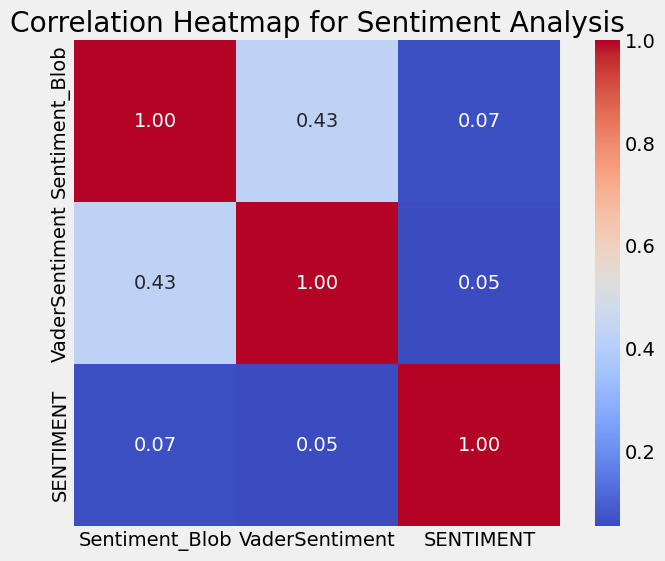

In [ ]:
def plot_sentiment_heatmap(df):
    columns_to_correlate = ['Sentiment_Blob', 'VaderSentiment', 'SENTIMENT']
    correlations = df[columns_to_correlate].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Heatmap for Sentiment Analysis')
plot_sentiment_heatmap(df)


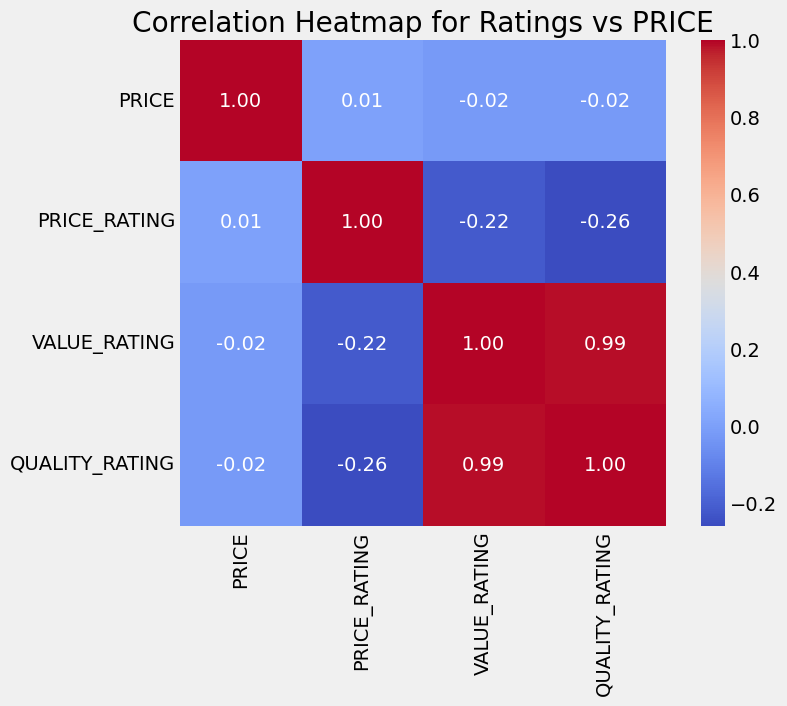

In [ ]:
def plot_sentiment_heatmap(df):
    columns_to_correlate = ['PRICE', 'PRICE_RATING', 'VALUE_RATING','QUALITY_RATING',]
    correlations = df[columns_to_correlate].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Heatmap for Ratings vs PRICE')
plot_sentiment_heatmap(df)


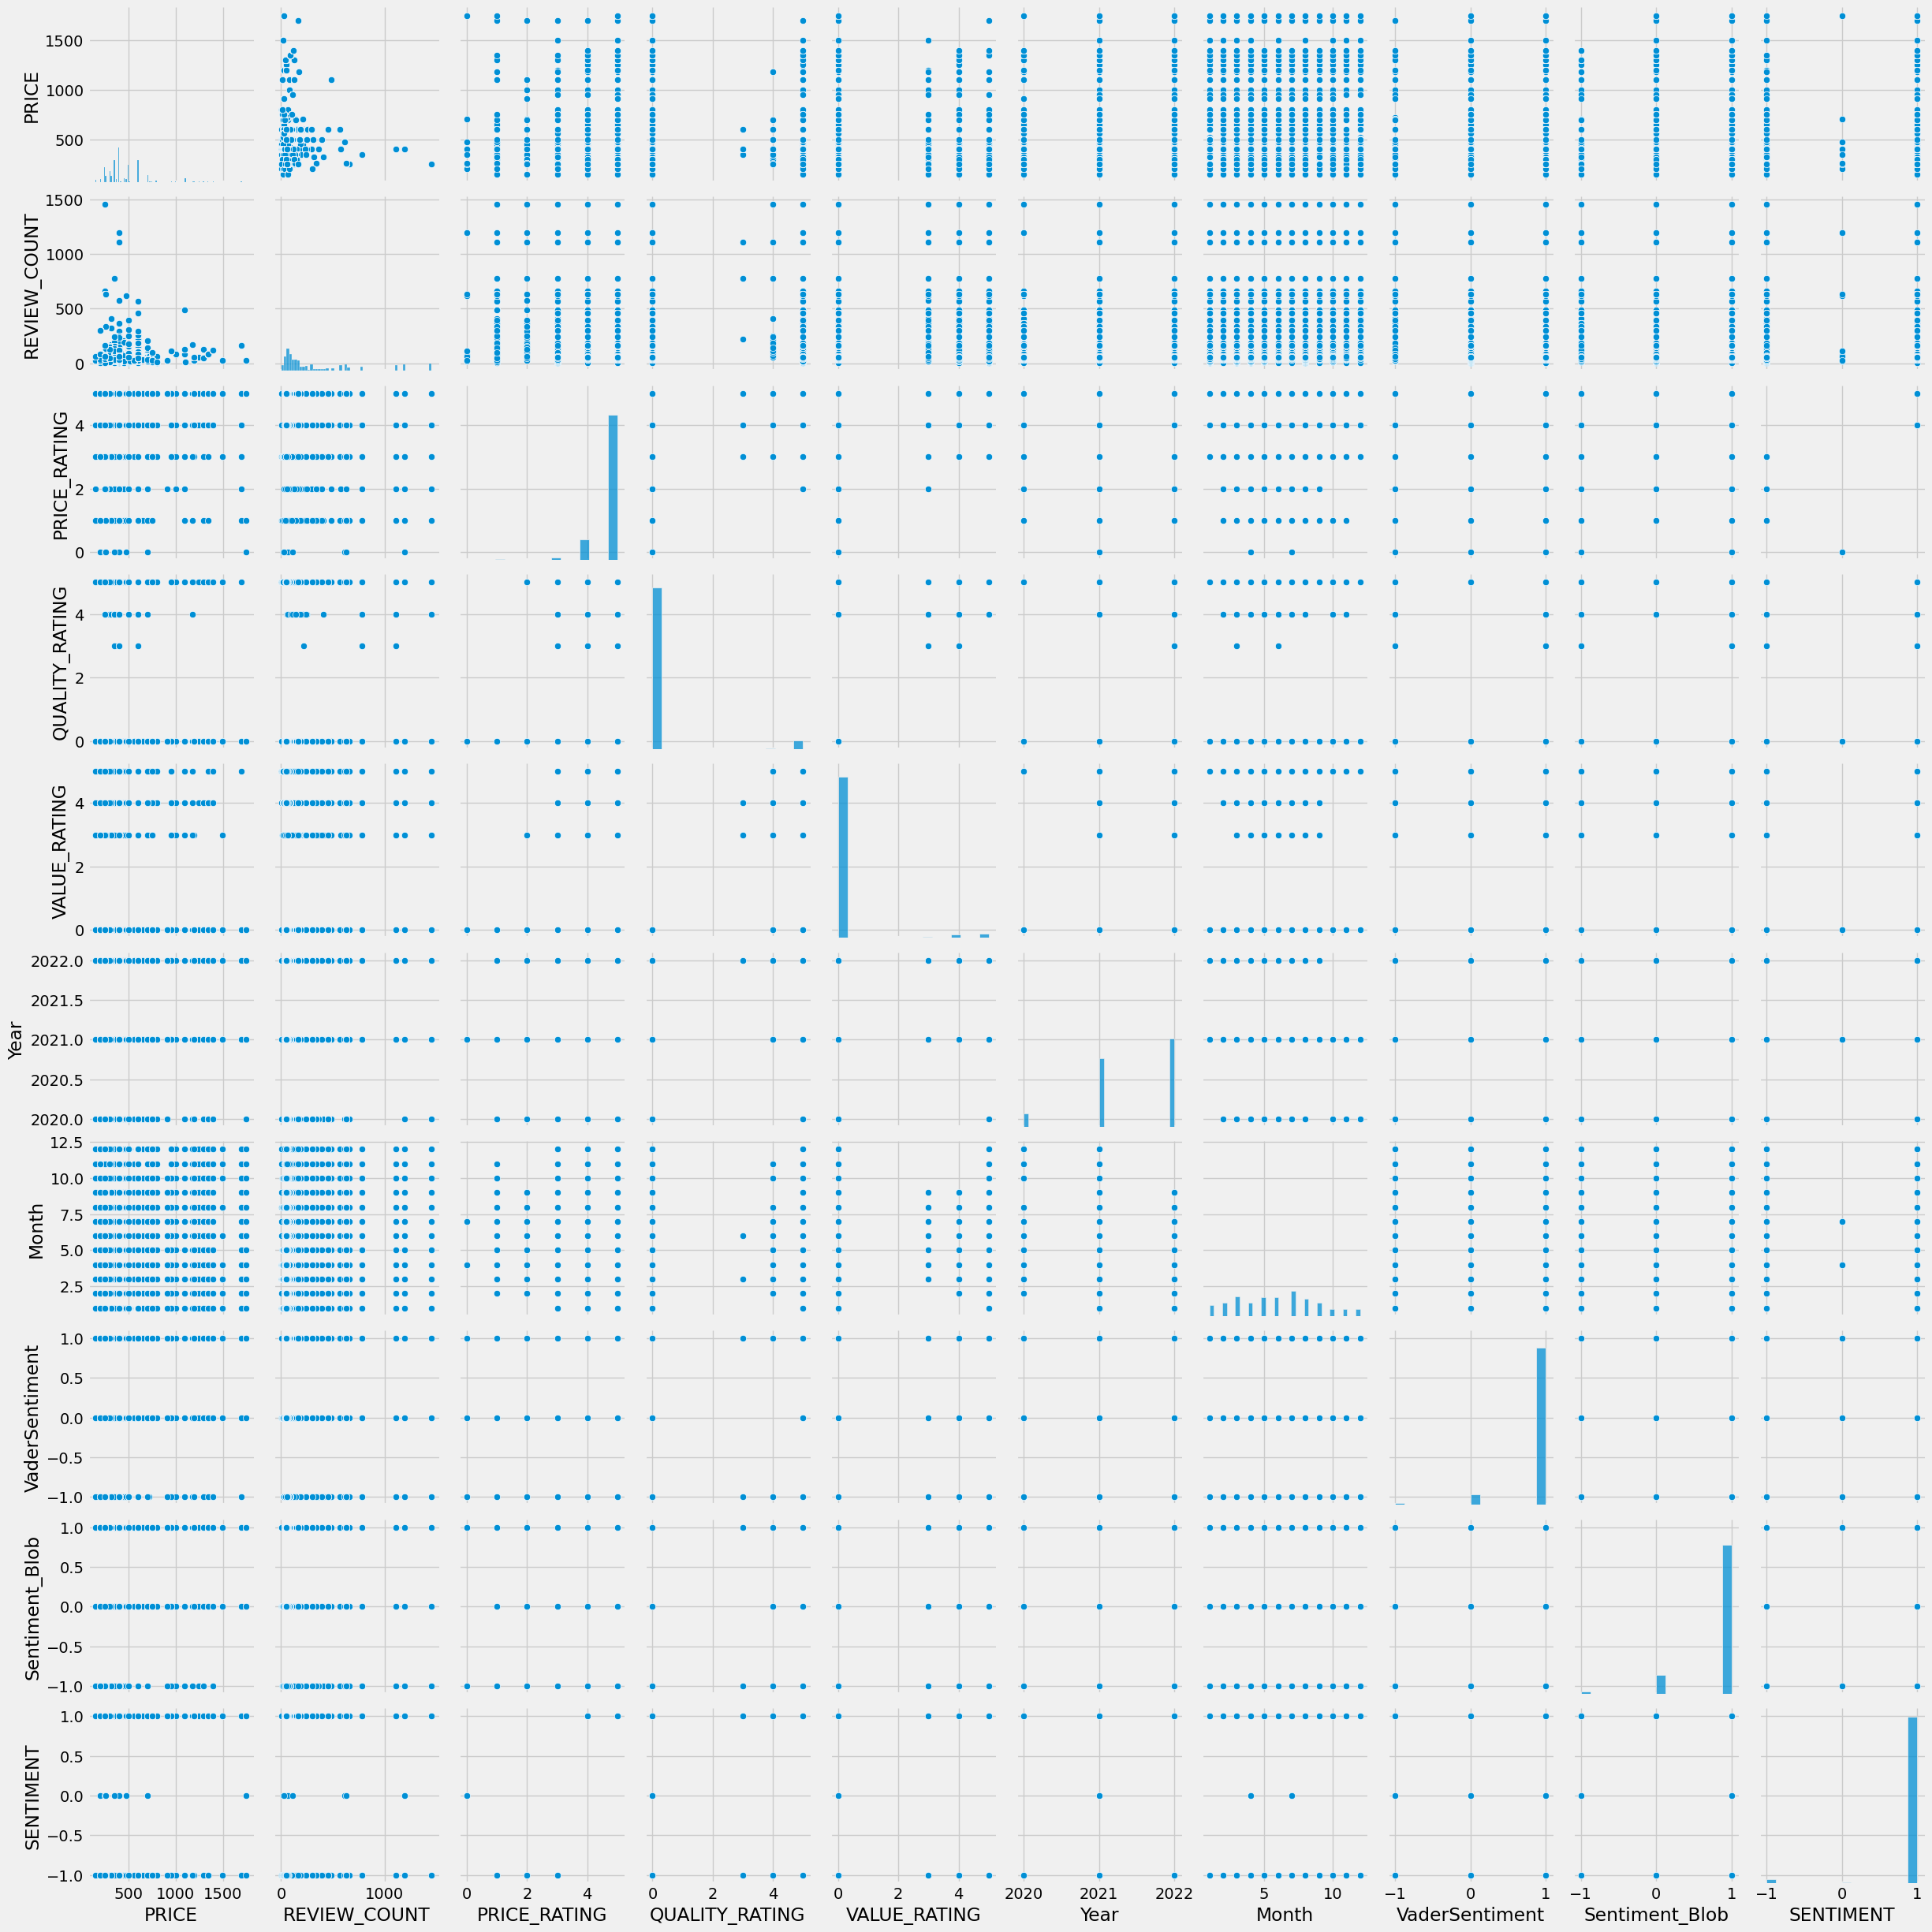

In [ ]:
sns.pairplot(df,  diag_kind='hist')
plt.show()

# BART

In [ ]:
# import torch
# from transformers import BartForSequenceClassification, BartTokenizer

In [ ]:
# # Load BART model and tokenizer
# model_name = "facebook/bart-large-mnli"
# tokenizer = BartTokenizer.from_pretrained(model_name)
# model = BartForSequenceClassification.from_pretrained(model_name)

In [ ]:
# # Assuming df is your DataFrame containing the review content
# reviews = df['REVIEW_CONTENT'].tolist()

# # Tokenize the reviews
# encoded_inputs = tokenizer(reviews, padding=True, truncation=True, return_tensors="pt")


In [ ]:
# # Perform inference to obtain sentiment predictions
# with torch.no_grad():
#     outputs = model(**encoded_inputs)

# # Extract logits and predicted labels
# logits = outputs.logits
# predicted_labels = torch.argmax(logits, dim=1).tolist()

In [ ]:
# # Map sentiment labels to sentiments
# sentiment_mapping = {0: "negative", 1: "neutral", 2: "positive"}
# sentiments = [sentiment_mapping[label] for label in predicted_labels]

# # Add sentiment column to the DataFrame
# df['sentiment'] = sentiments

# # Print the counts of each sentiment
# sentiment_counts = df['sentiment'].value_counts()
# print("Positive:", sentiment_counts['positive'])
# print("Negative:", sentiment_counts['negative'])
# print("Neutral:", sentiment_counts['neutral'])

# RoBerta

In [ ]:
# # Load the pre-trained RoBERTa model and tokenizer
# MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)



In [ ]:
# def batch_process_sentiment(reviews, batch_size=32):
#     start_time = time.time()
#     num_batches = len(reviews) // batch_size + (1 if len(reviews) % batch_size != 0 else 0)
#     sentiments = []

#     for i in range(num_batches):
#         batch_reviews = reviews[i * batch_size: (i + 1) * batch_size]
#         encoded_batch = tokenizer(batch_reviews, padding=True, truncation=True, return_tensors="pt")
#         output = model(**encoded_batch)
#         scores = output.logits.detach().numpy()
#         scores = softmax(scores, axis=1)
#         batch_sentiments = np.argmax(scores, axis=1)
#         sentiments.extend(batch_sentiments)

#     end_time = time.time()
#     print("Sentiment analysis completed in {:.2f} seconds.".format(end_time - start_time))
#     return sentiments

In [ ]:
# import time
# # Assuming df is your DataFrame containing the data
# reviews = df['REVIEW_CONTENT'].tolist()

# # Perform sentiment analysis in batches
# sentiments = batch_process_sentiment(reviews)


In [ ]:
# # Print value counts of sentiments
# print(df['SENTIMENT'].value_counts())

In [ ]:
# # Assign the predicted sentiments back to the DataFrame
# df['RoBERTa'] = predicted_sentiments

# # Print the sentiment distribution
# print("\nRoBERTa:")
# print(df['RoBERTa'].value_counts())
